## Q1

23 23


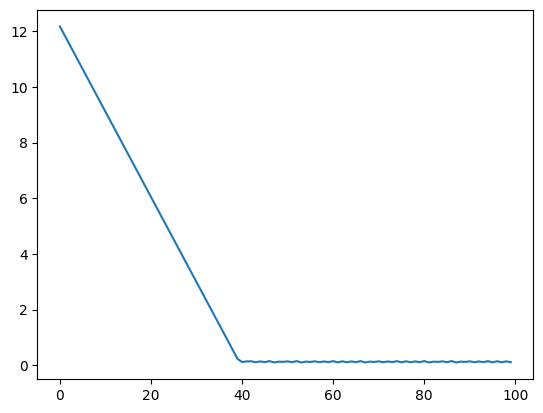

In [8]:
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6])
b = torch.rand([1],requires_grad = True)
w = torch.rand([1],requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += torch.norm(y[j] - y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad

    w.grad = None
    b.grad = None

plt.plot(loss_list)

## Q2

After 0 epochs, w = tensor([0.0573], requires_grad=True),b = tensor([0.3920], requires_grad=True),loss = 29.446178436279297
After 10 epochs, w = tensor([0.0873], requires_grad=True),b = tensor([0.4020], requires_grad=True),loss = 29.346179962158203
After 20 epochs, w = tensor([0.1173], requires_grad=True),b = tensor([0.4120], requires_grad=True),loss = 29.24618148803711
After 30 epochs, w = tensor([0.1473], requires_grad=True),b = tensor([0.4220], requires_grad=True),loss = 29.14617919921875
After 40 epochs, w = tensor([0.1773], requires_grad=True),b = tensor([0.4320], requires_grad=True),loss = 29.046180725097656
After 50 epochs, w = tensor([0.2073], requires_grad=True),b = tensor([0.4420], requires_grad=True),loss = 28.946182250976562
After 60 epochs, w = tensor([0.2373], requires_grad=True),b = tensor([0.4520], requires_grad=True),loss = 28.846179962158203
After 70 epochs, w = tensor([0.2673], requires_grad=True),b = tensor([0.4620], requires_grad=True),loss = 28.746179580688477
Aft

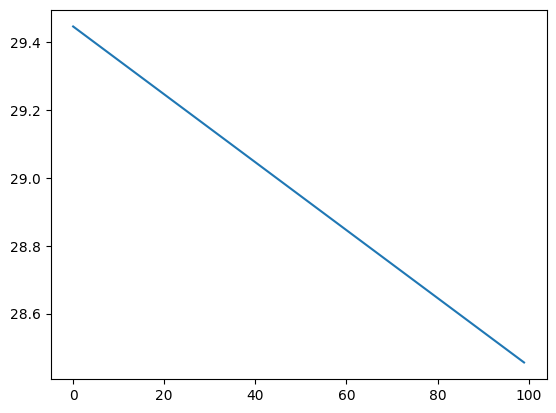

In [28]:
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

inp_x = np.array([2,4])
inp_y = np.array([20,40])

x = torch.tensor(inp_x)
y = torch.tensor(inp_y)
b = torch.rand([1],requires_grad = True)
w = torch.rand([1],requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += torch.norm(y[j] - y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
    
    w.grad = None
    b.grad = None
    if epochs%10==0:
            print("After {} epochs, w = {},b = {},loss = {}".format(epochs,w,b,loss))

def analytical(x,y,w,b):  
    loss = 0
    loss_list = []
    for epochs in range(100):
        for j in range(len(x)):
            y_p = w*x[j] + b
            loss += (y[j] - y_p)**2
        loss = loss/len(x)
        loss_list.append(loss.item())
    
        wgrad,bgrad = 0,0
        
        for i in range(len(x)):
            wgrad += (y[j] - y_p)*(x[i])*2/len(x)
            bgrad += (y[j] - y_p)*2/len(x)
        w -= 0.001*wgrad*2/len(x)
        b -= 0.001*bgrad*2/len(x)
        
        if epochs%10==0:
            print("After {} epochs, w = {},b = {},loss = {}".format(epochs,w,b,loss))

print("Analytical Solution")

analytical(inp_x,inp_y,1,1)

plt.plot(loss_list)

## Q3

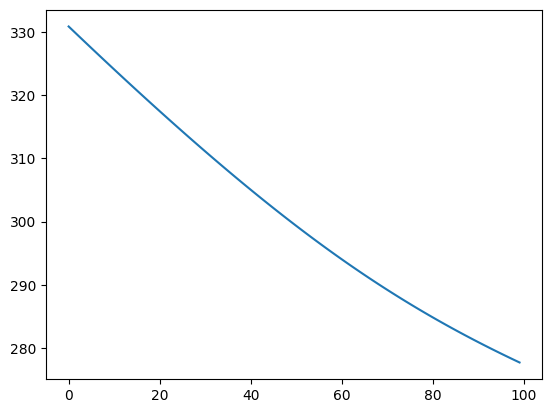

In [14]:
x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1],requires_grad = True)
        self.b = torch.rand([1],requires_grad = True)
    def forward(self,x):
        return self.w*x + self.b
    def update(self):
        self.w -= learning_rate*self.w.grad
        self.b -= learning_rate*self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj,y_p):
    return (yj - y_p)**2

model = RegressionModel()
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x)
        loss += torch.norm(y[j] - y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w -= learning_rate*model.w.grad
        b -= learning_rate*model.b.grad

    w.grad = None
    b.grad = None

    with torch.no_grad():
        model.update()
    model.reset_grad()

plt.plot(loss_list)